Libraries Imported
Data Loaded
Features normalized
Data has been split
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                   

2024-05-31 23:32:42.602161: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-31 23:32:42.661739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-31 23:32:42.661792: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-31 23:32:42.662709: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the app

None
Epoch 1/25


2024-05-31 23:32:45.198464: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2024-05-31 23:32:47.520510: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


374/374 [==============================] - 8s 9ms/step - loss: 0.6703 - accuracy: 0.5784 - val_loss: 0.6274 - val_accuracy: 0.6736
Epoch 2/25
374/374 [==============================] - 3s 8ms/step - loss: 0.6089 - accuracy: 0.6722 - val_loss: 0.5813 - val_accuracy: 0.6936
Epoch 3/25
374/374 [==============================] - 3s 7ms/step - loss: 0.5669 - accuracy: 0.7105 - val_loss: 0.5453 - val_accuracy: 0.7278
Epoch 4/25
374/374 [==============================] - 3s 8ms/step - loss: 0.5229 - accuracy: 0.7447 - val_loss: 0.5256 - val_accuracy: 0.7441
Epoch 5/25
374/374 [==============================] - 3s 7ms/step - loss: 0.4885 - accuracy: 0.7648 - val_loss: 0.4992 - val_accuracy: 0.7532
Epoch 6/25
374/374 [==============================] - 3s 8ms/step - loss: 0.4573 - accuracy: 0.7858 - val_loss: 0.4656 - val_accuracy: 0.7769
Epoch 7/25
374/374 [==============================] - 3s 7ms/step - loss: 0.4324 - accuracy: 0.8003 - val_loss: 0.4730 - val_accuracy: 0.7709
Epoch 8/25
374/37

/tmp/ipykernel_47120/3250289045.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


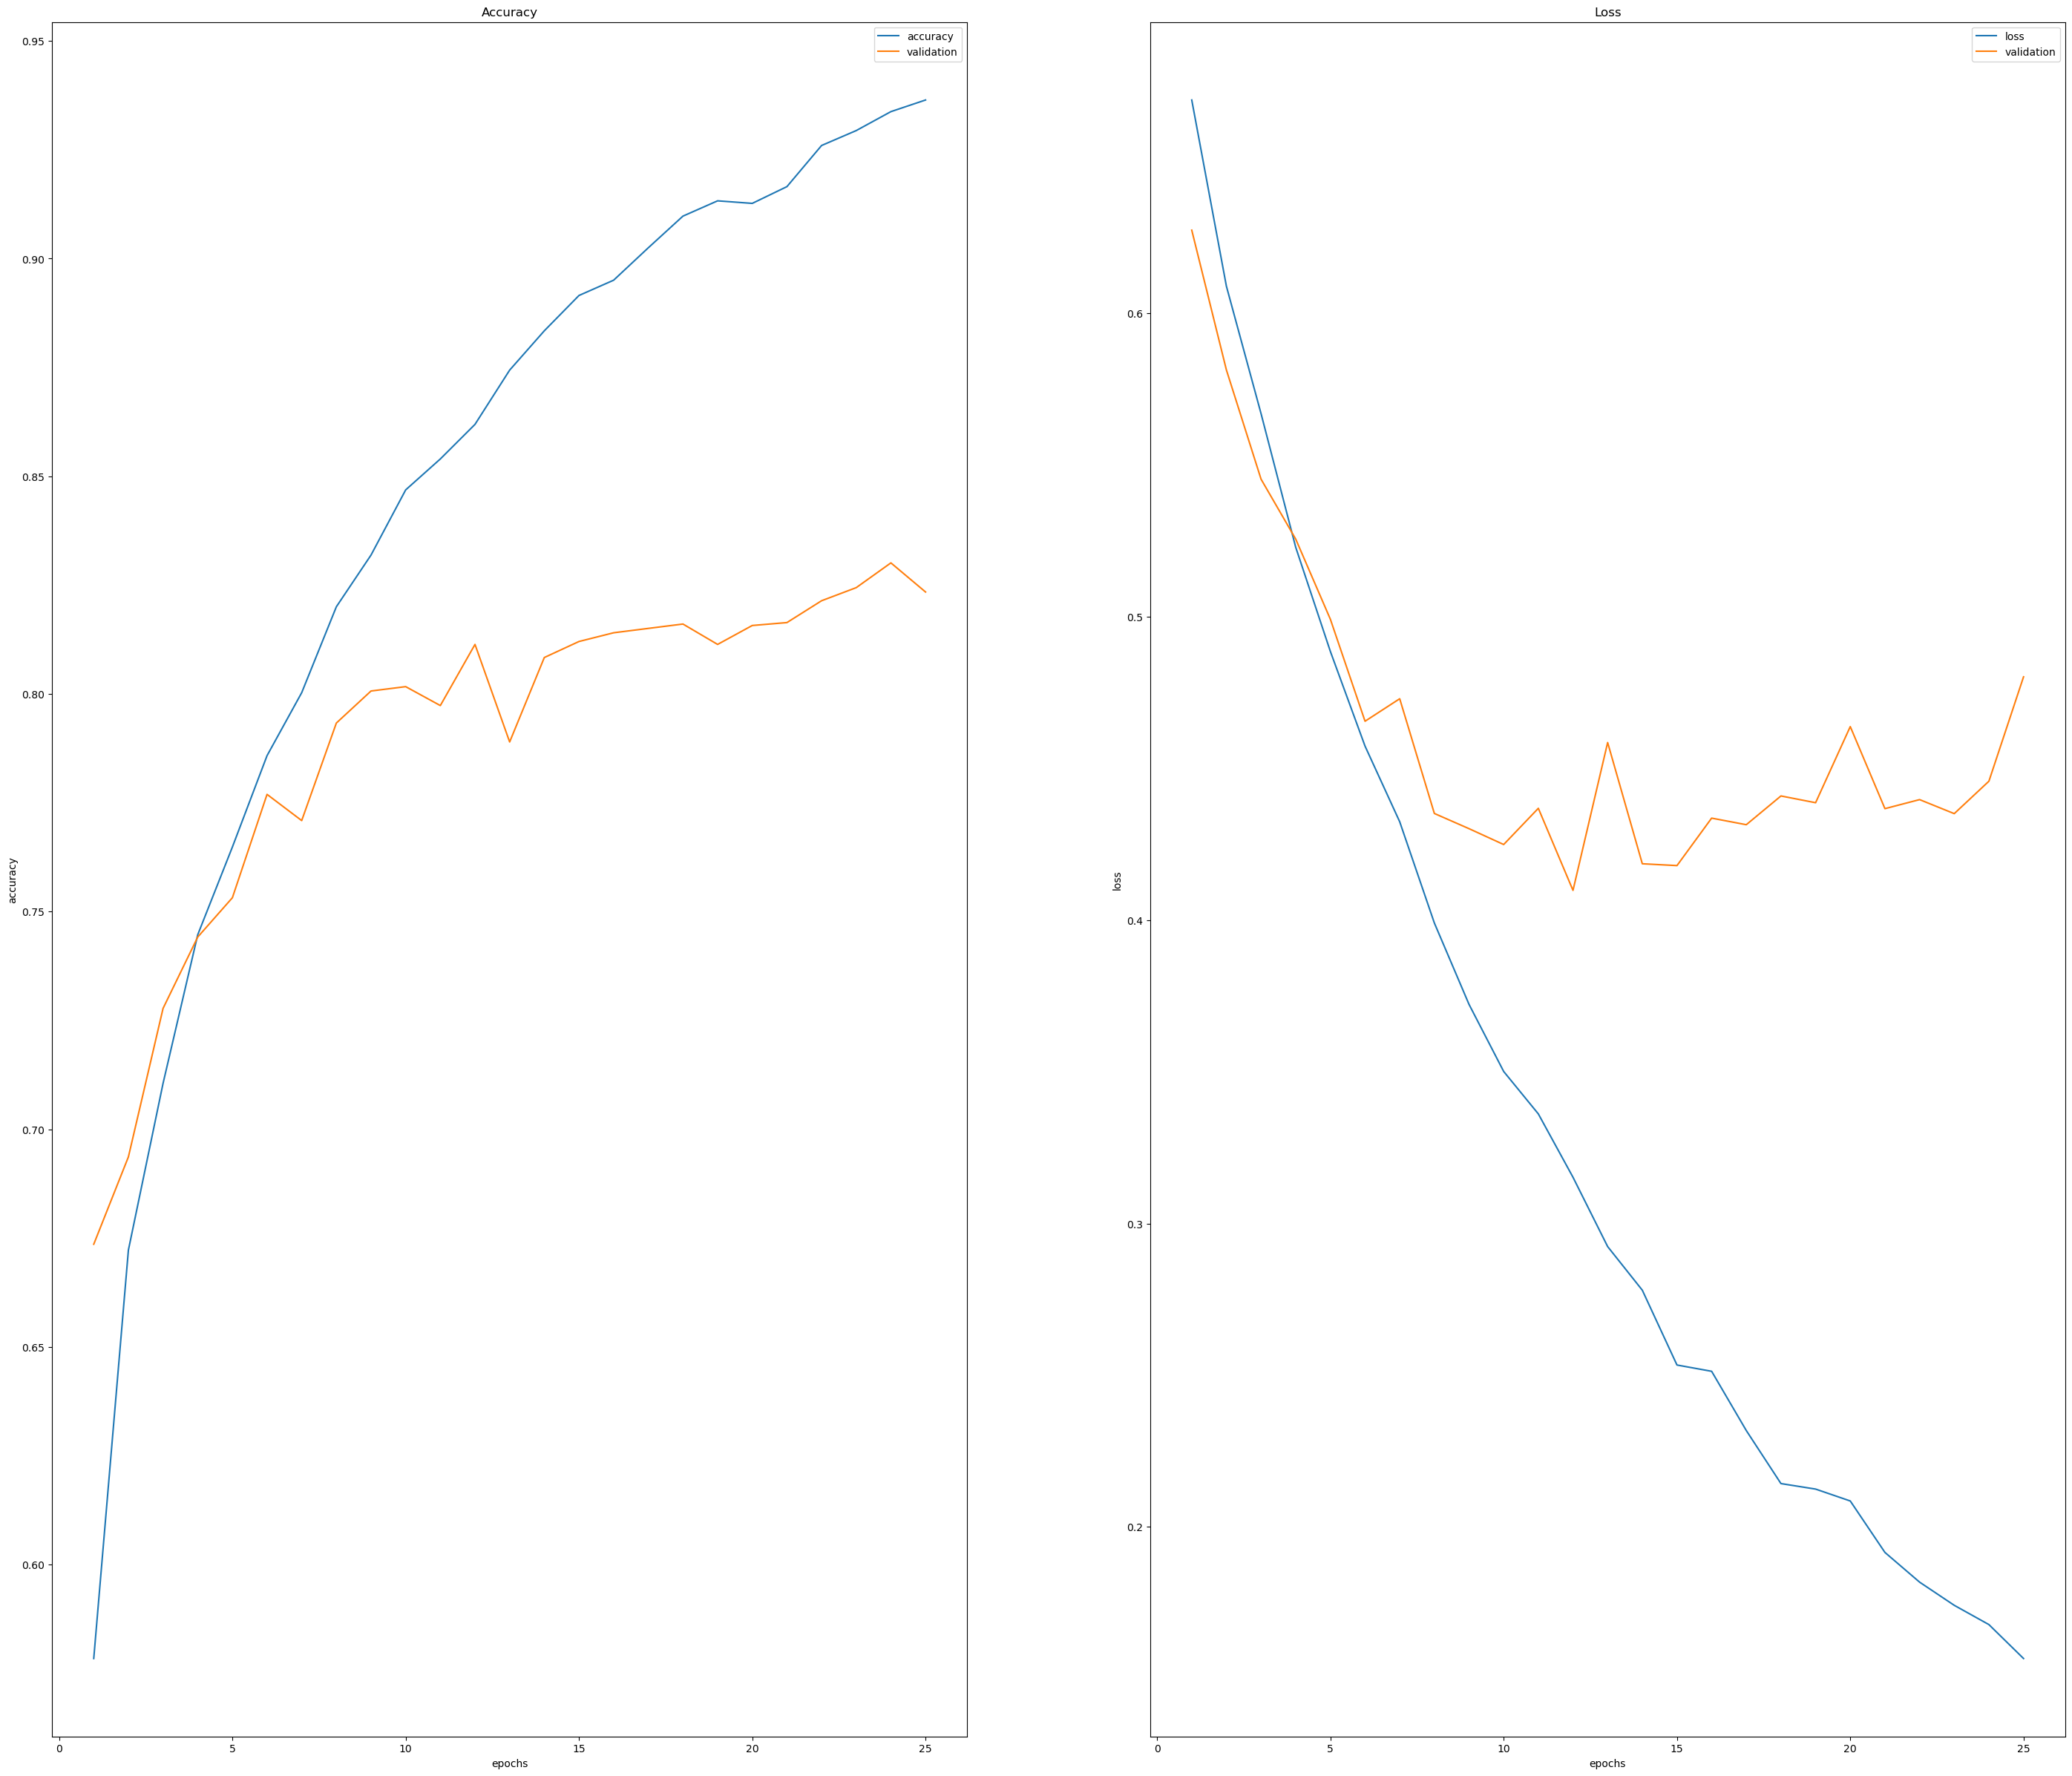

In [1]:
#Importing Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print('Libraries Imported')

#Loading data
features = np.load('Data/Preprocessed/features.npy')
labels = np.load('Data/Preprocessed/labels.npy')
print('Data Loaded')

#Normalizing features
features = (features - features.min())/(features.max() - features.min())
print('Features normalized')

#Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state=42)
print('Data has been split')

#Building Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(50, 50, 1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

print(model.summary())

#Compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

#Model Training
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

epochs = list(range(1,26))

fig, ax = plt.subplots(1, 2, figsize=(35, 30))
ax[0].plot(epochs, history.history['accuracy'], label='accuracy')
ax[0].plot(epochs, history.history['val_accuracy'], label='validation')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[0].set_title('Accuracy')
ax[0].legend()

ax[1].plot(epochs, history.history['loss'], label='loss')
ax[1].plot(epochs, history.history['val_loss'], label='validation')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Loss')
ax[1].legend()

fig.show()